<a href="https://colab.research.google.com/github/Olivier520100/EcoCompute_HackHarvard_2024/blob/main/ecocompute_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import json

In [6]:
# prompt: import germany_wind_data json

import pandas as pd
with open('Germany_wind_data.json', 'r') as f:
  data = json.load(f)

df_generations = pd.DataFrame(data["dailyGenerations"])
df_generations

,generation,countryName,date
0,9.263635e+10,Germany,2024-03-18T00:00:00Z
1,4.242398e+10,Germany,2024-03-18T00:00:00Z
2,1.470002e+11,Germany,2024-03-17T00:00:00Z
3,8.031949e+10,Germany,2024-03-17T00:00:00Z
4,5.293108e+11,Germany,2024-03-16T00:00:00Z
...,...,...,...
2951,3.090349e+10,Germany,2020-03-04T00:00:00Z
2952,2.762206e+10,Germany,2020-03-03T00:00:00Z
2953,2.552402e+11,Germany,2020-03-03T00:00:00Z
2954,3.989625e+10,Germany,2020-03-02T00:00:00Z


In [7]:
df_grouped = df_generations.groupby('date')
df_sums = df_grouped.agg({
    'generation': 'sum',  # Sum the generation values
    'countryName': 'first'  # Take the first country name to avoid concatenation
}).reset_index()

df_sums

,date,generation,countryName
0,2020-03-02T00:00:00Z,2.785720e+11,Germany
1,2020-03-03T00:00:00Z,2.828622e+11,Germany
2,2020-03-04T00:00:00Z,2.238519e+11,Germany
3,2020-03-05T00:00:00Z,3.442027e+11,Germany
4,2020-03-06T00:00:00Z,5.446805e+11,Germany
...,...,...,...
1473,2024-03-14T00:00:00Z,3.987701e+11,Germany
1474,2024-03-15T00:00:00Z,6.320115e+11,Germany
1475,2024-03-16T00:00:00Z,6.225702e+11,Germany
1476,2024-03-17T00:00:00Z,2.273197e+11,Germany


In [8]:
df_prices = pd.DataFrame(data["dailyPrices"])
df_prices_grouped = df_prices.groupby('date')
df_prices_sums = df_prices_grouped.agg({
    'priceEuroPerMwh': 'mean',  # Sum the generation values
    'countryName': 'first'  # Take the first country name to avoid concatenation
}).reset_index()

df_prices_sums

,date,priceEuroPerMwh,countryName
0,2021-03-01T00:00:00Z,49.840833,Germany
1,2021-03-02T00:00:00Z,53.549167,Germany
2,2021-03-03T00:00:00Z,52.019583,Germany
3,2021-03-04T00:00:00Z,53.971667,Germany
4,2021-03-05T00:00:00Z,53.702083,Germany
...,...,...,...
1109,2024-03-14T00:00:00Z,66.440833,Germany
1110,2024-03-15T00:00:00Z,55.722083,Germany
1111,2024-03-16T00:00:00Z,51.230833,Germany
1112,2024-03-17T00:00:00Z,61.778333,Germany


In [9]:
merged_df = pd.merge(df_sums, df_prices_sums, on='date', how='inner')
merged_df = merged_df.drop(columns=['countryName_y'])
merged_df = merged_df.rename(columns={'countryName_x': 'countryName'})
merged_df.head()

,date,generation,countryName,priceEuroPerMwh
0,2021-03-01T00:00:00Z,9.578518e+10,Germany,49.840833
1,2021-03-02T00:00:00Z,9.214241e+10,Germany,53.549167
2,2021-03-03T00:00:00Z,1.560190e+11,Germany,52.019583
3,2021-03-04T00:00:00Z,2.432049e+11,Germany,53.971667
4,2021-03-05T00:00:00Z,1.820682e+11,Germany,53.702083


In [10]:
df = merged_df.drop(columns=["countryName"])
df.head()

,date,generation,priceEuroPerMwh
0,2021-03-01T00:00:00Z,9.578518e+10,49.840833
1,2021-03-02T00:00:00Z,9.214241e+10,53.549167
2,2021-03-03T00:00:00Z,1.560190e+11,52.019583
3,2021-03-04T00:00:00Z,2.432049e+11,53.971667
4,2021-03-05T00:00:00Z,1.820682e+11,53.702083


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assume df is your DataFrame
# Convert 'date' to datetime and then to ordinal to represent it numerically
df['date'] = pd.to_datetime(df['date'])
df['date_ordinal'] = df['date'].apply(lambda x: x.toordinal())

# Features and target variable
X = df[['date_ordinal', 'generation']]
y = df['priceEuroPerMwh']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=10000, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1421.5871570901115


In [12]:
# prompt: Scale the values

from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Now use X_train_scaled and X_test_scaled for training and testing your model
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 1416.0242807400698


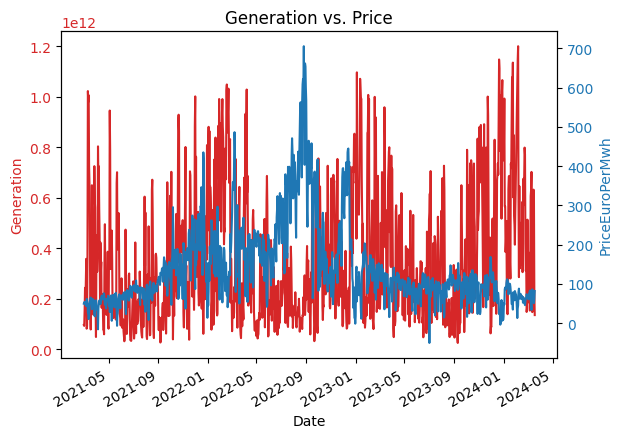

In [13]:
# prompt: plot a graph of generation alongisde price

import matplotlib.pyplot as plt

# Create a figure and axes
fig, ax1 = plt.subplots()

# Plot generation on the primary y-axis
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Generation', color=color)
ax1.plot(df['date'], df['generation'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a secondary y-axis for price
ax2 = ax1.twinx()  # Create a twin Axes sharing the x-axis

color = 'tab:blue'
ax2.set_ylabel('PriceEuroPerMwh', color=color)
ax2.plot(df['date'], df['priceEuroPerMwh'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Rotate x-axis labels for better readability
fig.autofmt_xdate()

# Show the plot
plt.title('Generation vs. Price')
plt.show()


In [14]:
!pip install prophet

In [17]:
prophet_df = df.rename(columns={'date': 'ds', 'priceEuroPerMwh': 'y'})
prophet_df = df.drop(columns=['date_ordinal'])
prophet_df.head()

,date,generation,priceEuroPerMwh
0,2021-03-01 00:00:00+00:00,9.578518e+10,49.840833
1,2021-03-02 00:00:00+00:00,9.214241e+10,53.549167
2,2021-03-03 00:00:00+00:00,1.560190e+11,52.019583
3,2021-03-04 00:00:00+00:00,2.432049e+11,53.971667
4,2021-03-05 00:00:00+00:00,1.820682e+11,53.702083


In [24]:
prophet_df['ds'] = pd.to_datetime(df['date']).dt.date
prophet_df['y'] = prophet_df["priceEuroPerMwh"]
prophet_df = prophet_df.drop(columns=["priceEuroPerMwh", "priceEuroPerMwh"])
prophet_df.head()

,generation,ds,y
0,9.578518e+10,2021-03-01,49.840833
1,9.214241e+10,2021-03-02,53.549167
2,1.560190e+11,2021-03-03,52.019583
3,2.432049e+11,2021-03-04,53.971667
4,1.820682e+11,2021-03-05,53.702083


In [31]:
# Assuming you have a dataframe 'df' with columns 'ds' (date) and 'y' (value)
train_size = int(len(prophet_df) * 0.8)
train = prophet_df[:train_size]
test = prophet_df[train_size:]

In [32]:
from prophet import Prophet
m = Prophet()
m.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwuz1v0i7/hepvp8de.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwuz1v0i7/thoxp_ex.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12369', 'data', 'file=/tmp/tmpwuz1v0i7/hepvp8de.json', 'init=/tmp/tmpwuz1v0i7/thoxp_ex.json', 'output', 'file=/tmp/tmpwuz1v0i7/prophet_model2nut3xz6/prophet_model-20241012132216.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:22:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:22:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [34]:
future = m.make_future_dataframe(periods=len(test))
forecast = m.predict(future)

In [35]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-03-01,56.346045,-8.966854,154.044620,56.346045,56.346045,14.015986,14.015986,14.015986,8.601556,8.601556,8.601556,5.414430,5.414430,5.414430,0.0,0.0,0.0,70.362031
1,2021-03-02,56.516296,6.185164,164.549870,56.516296,56.516296,30.304137,30.304137,30.304137,21.325426,21.325426,21.325426,8.978711,8.978711,8.978711,0.0,0.0,0.0,86.820434
2,2021-03-03,56.686547,7.010788,166.880135,56.686547,56.686547,30.062996,30.062996,30.062996,18.272292,18.272292,18.272292,11.790704,11.790704,11.790704,0.0,0.0,0.0,86.749543
3,2021-03-04,56.856798,7.460765,157.611578,56.856798,56.856798,27.316147,27.316147,27.316147,13.492128,13.492128,13.492128,13.824019,13.824019,13.824019,0.0,0.0,0.0,84.172946
4,2021-03-05,57.027049,-6.787257,158.581262,57.027049,57.027049,19.755717,19.755717,19.755717,4.684524,4.684524,4.684524,15.071193,15.071193,15.071193,0.0,0.0,0.0,76.782766


In [36]:
forecast_test = forecast[-len(test):]  # Get only the predicted values for the test period

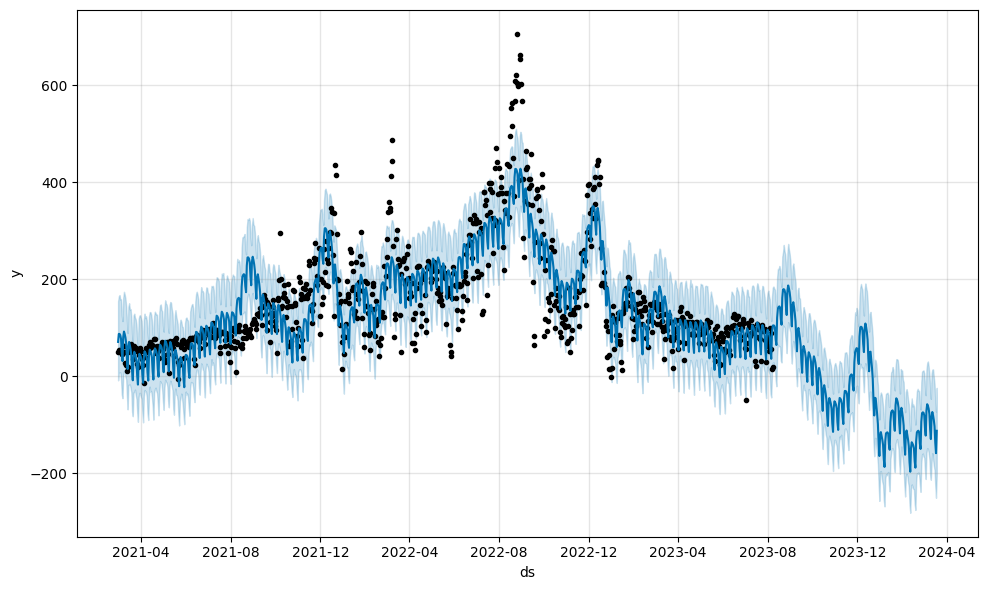

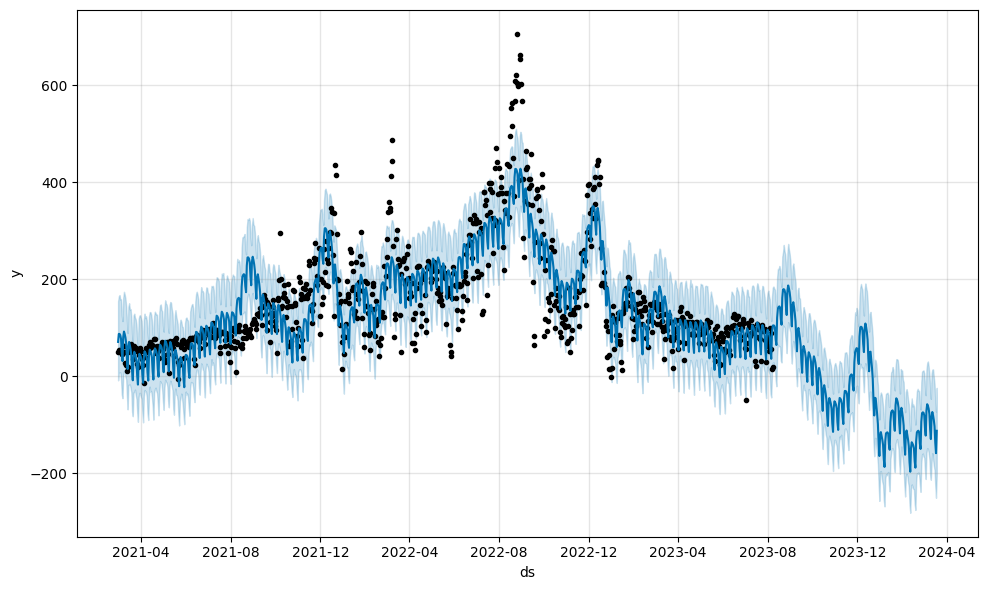

In [40]:
m.plot(forecast)

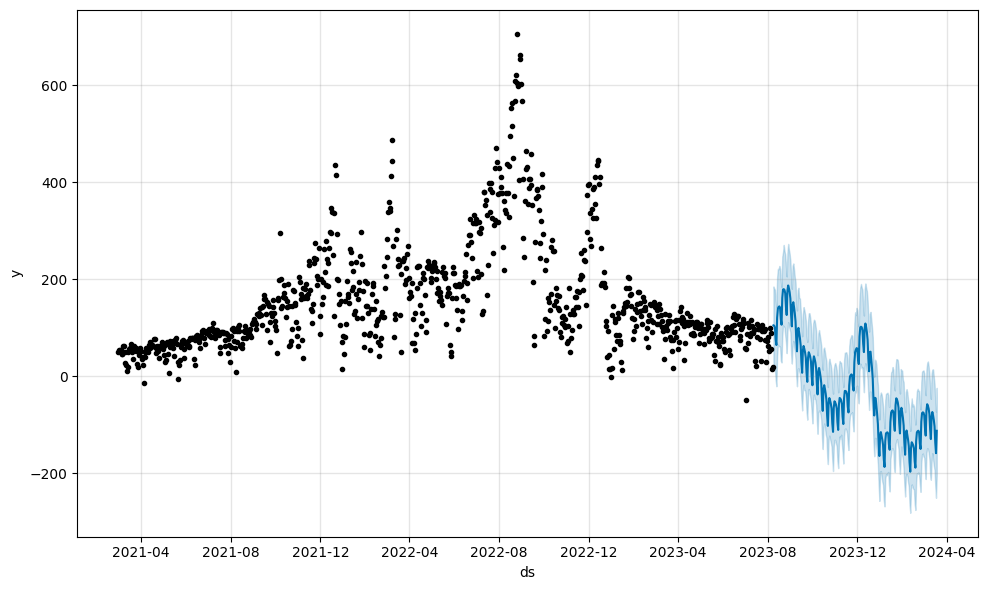

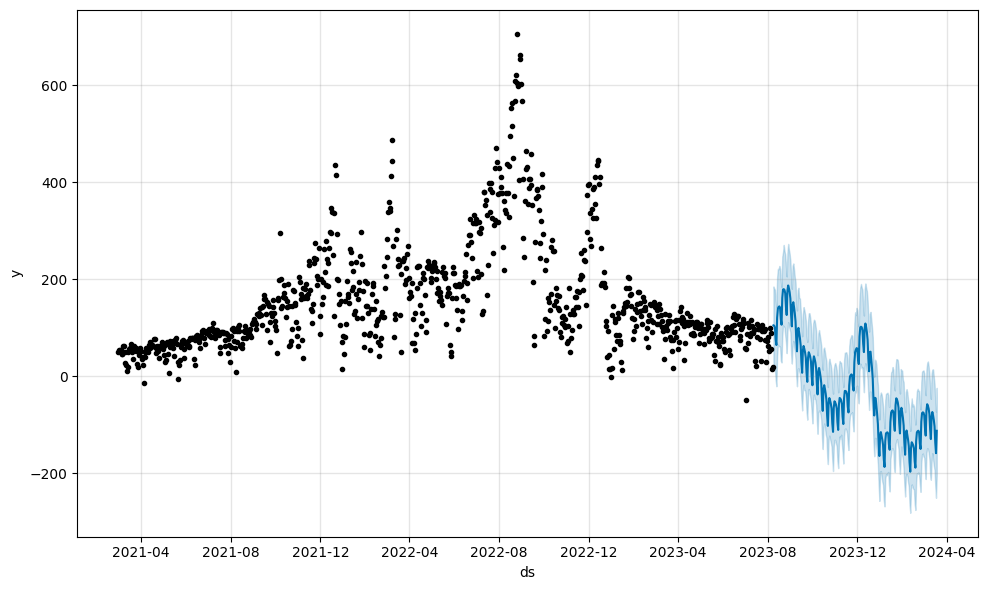

In [38]:
m.plot(forecast_test)

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_true = test['y'].values
y_pred = forecast_test['yhat'].values

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MAE: 113.64143011698273
RMSE: 132.82595848200913


In [41]:
import pandas as pd

# Convert test_dates to proper datetime format for plotting

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(test_dates, y_true, 'o-', label='Actual', color='blue')
plt.plot(test_dates, y_pred, 'x--', label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Actual vs Predicted values in test set')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


NameError: name 'test_dates' is not defined

In [44]:
import pandas as pd
df = pd.read_csv("wind_europe_data.csv")
df.head()

,date,generation,countryName,priceEuroPerMwh
0,2021-03-01,1.151500e+10,Austria,50.799167
1,2021-03-02,9.050000e+08,Austria,55.602917
2,2021-03-03,1.485000e+09,Austria,53.721667
3,2021-03-04,9.593000e+09,Austria,54.037083
4,2021-03-05,3.440100e+10,Austria,53.510833


In [55]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_pipeline = make_pipeline(
  StandardScaler()
)

categorical_pipeline = make_pipeline(
  OneHotEncoder()
)

# Create the preprocessing transformer
preprocessing = ColumnTransformer([
    # ('cat', categorical_pipeline, ['countryName']),  # Select the 'countryName' column
    ('num', num_pipeline, make_column_selector(dtype_exclude='object'))  # Select all non-categorical columns
])

In [54]:
df.head()

,date,generation,countryName,priceEuroPerMwh
0,2021-03-01,1.151500e+10,Austria,50.799167
1,2021-03-02,9.050000e+08,Austria,55.602917
2,2021-03-03,1.485000e+09,Austria,53.721667
3,2021-03-04,9.593000e+09,Austria,54.037083
4,2021-03-05,3.440100e+10,Austria,53.510833


In [58]:
# prompt: scale df[generation] and df[priceEuroPerMwh

from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the 'generation' and 'priceEuroPerMwh' columns
df[['generation', 'priceEuroPerMwh']] = scaler.fit_transform(df[['generation', 'priceEuroPerMwh']])

# Now the 'generation' and 'priceEuroPerMwh' columns are scaled between 0 and 1
df.head()


,date,generation,countryName,priceEuroPerMwh
0,2021-03-01,0.009595,Austria,0.232112
1,2021-03-02,0.000754,Austria,0.236518
2,2021-03-03,0.001237,Austria,0.234793
3,2021-03-04,0.007993,Austria,0.235082
4,2021-03-05,0.028664,Austria,0.234599


In [59]:
# prompt: make one hot encoding for df[countryName]

import pandas as pd
# Perform one-hot encoding on the 'countryName' column
df = pd.get_dummies(df, columns=['countryName'], prefix=['country'])
df.head()

,date,generation,priceEuroPerMwh,country_Austria,country_Belgium,country_Bulgaria,country_Croatia,country_Denmark,country_Estonia,country_Finland,...,country_Poland,country_Portugal,country_Romania,country_Serbia,country_Slovakia,country_Slovenia,country_Spain,country_Sweden,country_Switzerland,country_Ukraine
0,2021-03-01,0.009595,0.232112,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2021-03-02,0.000754,0.236518,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2021-03-03,0.001237,0.234793,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2021-03-04,0.007993,0.235082,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2021-03-05,0.028664,0.234599,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [64]:
df = df.rename(columns={'date': 'ds', 'priceEuroPerMwh': 'y'})
df.head()

,ds,generation,y,country_Austria,country_Belgium,country_Bulgaria,country_Croatia,country_Denmark,country_Estonia,country_Finland,...,country_Poland,country_Portugal,country_Romania,country_Serbia,country_Slovakia,country_Slovenia,country_Spain,country_Sweden,country_Switzerland,country_Ukraine
0,2021-03-01,0.009595,0.232112,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2021-03-02,0.000754,0.236518,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2021-03-03,0.001237,0.234793,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2021-03-04,0.007993,0.235082,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2021-03-05,0.028664,0.234599,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [65]:
train_size = int(len(df) * 0.8)
train = df[:train_size]
test = df[train_size:]

In [66]:
from prophet import Prophet
m = Prophet()
m.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwuz1v0i7/tfvg3wo1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwuz1v0i7/itzmdu47.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13199', 'data', 'file=/tmp/tmpwuz1v0i7/tfvg3wo1.json', 'init=/tmp/tmpwuz1v0i7/itzmdu47.json', 'output', 'file=/tmp/tmpwuz1v0i7/prophet_modelurr3249u/prophet_model-20241012144634.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:46:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:46:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [80]:
# Convert the first and last dates to datetime
first_test_date = pd.to_datetime(test["ds"].iloc[-1])  # Last date in test
last_test_date = pd.to_datetime(test["ds"].iloc[0])    # First date in test

# Calculate the difference in days
periods_in_days = (last_test_date - first_test_date).days

In [81]:
periods_in_days

624

In [89]:
future = m.make_future_dataframe(periods=200)
forecast = m.predict(future)
forecast_test = forecast[-len(test):]  # Get only the predicted values for the test period

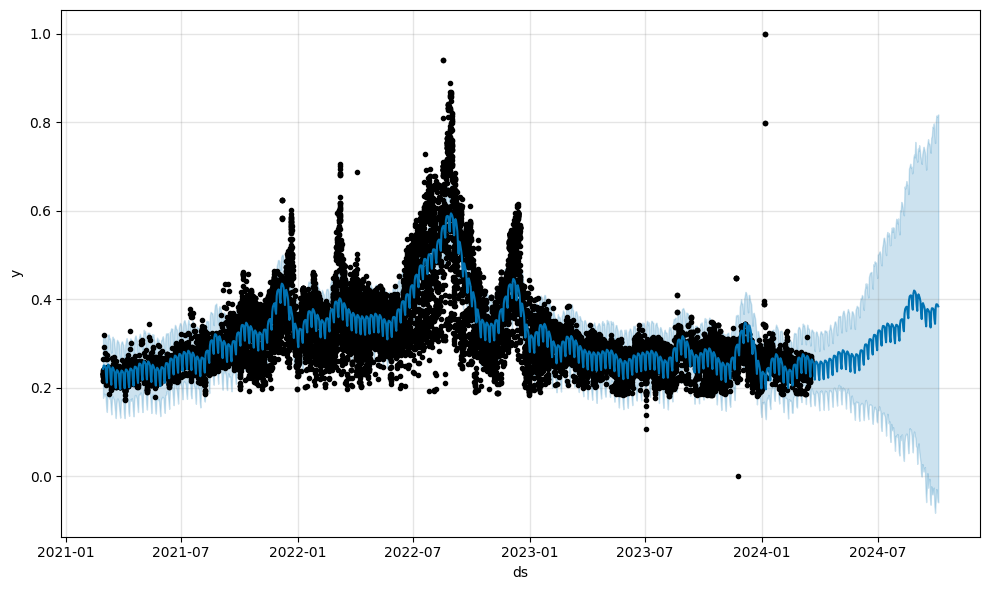

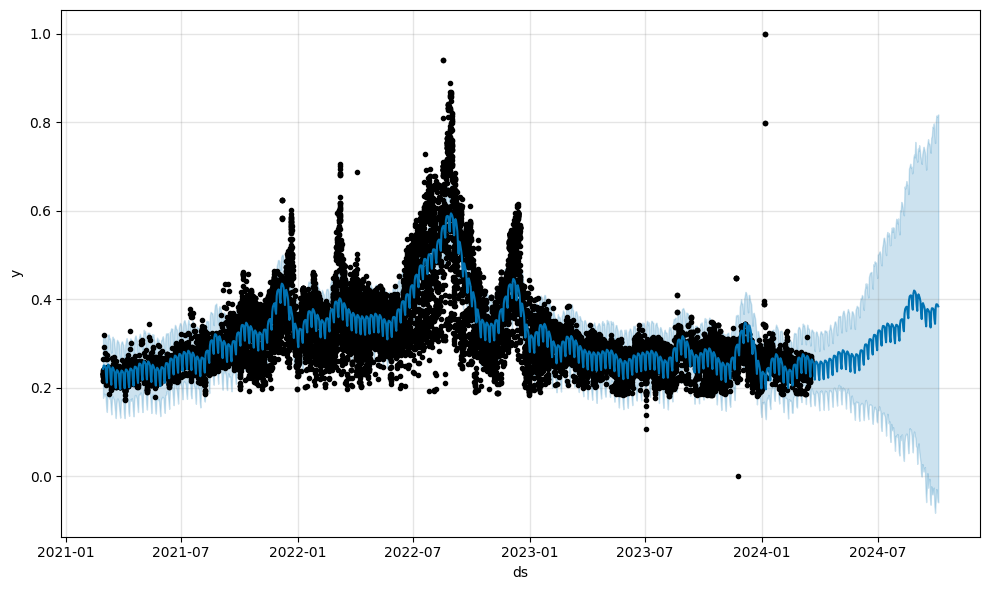

In [90]:
m.plot(forecast_test)

In [91]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_true = test['y'].values
y_pred = forecast_test['yhat'].values

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

ValueError: Found input variables with inconsistent numbers of samples: [5877, 1314]